In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [6]:
file_path = r"C:\Users\Vedika\Desktop\terriorm_project\globalterrorismdb_0718dist.csv"
df = pd.read_csv(file_path, encoding='latin1', low_memory=False)

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (181691, 135)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   country_txt      181691 non-null  object 
 4   region_txt       181691 non-null  object 
 5   latitude         177135 non-null  float64
 6   longitude        177134 non-null  float64
 7   attacktype1_txt  181691 non-null  object 
 8   weaptype1_txt    181691 non-null  object 
 9   target1          181053 non-null  object 
 10  gname            181691 non-null  object 
 11  nkill            181691 non-null  float64
 12  nwound           181691 non-null  float64
 13  casualties       181691 non-null  float64
dtypes: float64(5), int64(3), object(6)
memory usage: 19.4+ MB


In [21]:
df.describe()

,iyear,imonth,iday,latitude,longitude,nkill,nwound,casualties
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


In [54]:
df.columns

Index(['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'latitude',
       'longitude', 'attacktype1_txt', 'weaptype1_txt', 'target1', 'gname',
       'nkill', 'nwound', 'casualties'],
      dtype='object')

In [24]:
df.shape

(181691, 14)

In [51]:
scores = {}
for k in range(2, 11):
    print(k, end=', ')
    scores[k] = KMeans(n_clusters=k).fit(X).score(X)
_ = pd.Series(scores).plot.bar()

2, 

NameError: name 'X' is not defined

In [50]:
df['Cluster'] = KMeans(n_clusters=6).fit_predict(X) + 1
print('Silhouette Score:', silhouette_score(X, df['Cluster'], sample_size=10000) * 10000 // 1 / 100, '%')

NameError: name 'X' is not defined

In [26]:
df.head(10)

,iyear,imonth,iday,country_txt,region_txt,latitude,longitude,attacktype1_txt,weaptype1_txt,target1,gname,nkill,nwound,casualties
0,1970,7,2,Dominican Republic,Central America & Caribbean,18.456792,-69.951164,Assassination,Unknown,Julio Guzman,MANO-D,1.0,0.0,1.0
1,1970,0,0,Mexico,North America,19.371887,-99.086624,Hostage Taking (Kidnapping),Unknown,"Nadine Chaval, daughter",23rd of September Communist League,0.0,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,15.478598,120.599741,Assassination,Unknown,Employee,Unknown,1.0,0.0,1.0
3,1970,1,0,Greece,Western Europe,37.997490,23.762728,Bombing/Explosion,Explosives,U.S. Embassy,Unknown,0.0,0.0,0.0
4,1970,1,0,Japan,East Asia,33.580412,130.396361,Facility/Infrastructure Attack,Incendiary,U.S. Consulate,Unknown,0.0,0.0,0.0
5,1970,1,1,United States,North America,37.005105,-89.176269,Armed Assault,Firearms,Cairo Police Headquarters,Black Nationalists,0.0,0.0,0.0
6,1970,1,2,Uruguay,South America,-34.891151,-56.187214,Assassination,Firearms,Juan Maria de Lucah/Chief of Directorate of in...,Tupamaros (Uruguay),0.0,0.0,0.0
7,1970,1,2,United States,North America,37.791927,-122.225906,Bombing/Explosion,Explosives,Edes Substation,Unknown,0.0,0.0,0.0
8,1970,1,2,United States,North America,43.076592,-89.412488,Facility/Infrastructure Attack,Incendiary,"R.O.T.C. offices at University of Wisconsin, M...",New Year's Gang,0.0,0.0,0.0
9,1970,1,3,United States,North America,43.072950,-89.386694,Facility/Infrastructure Attack,Incendiary,Selective Service Headquarters in Madison Wisc...,New Year's Gang,0.0,0.0,0.0


df.columns.unique()

In [9]:
columns_needed = [
    'iyear', 'imonth', 'iday', 'country_txt', 'region_txt',
    'latitude', 'longitude', 'attacktype1_txt', 'weaptype1_txt',
    'target1', 'gname', 'nkill', 'nwound'
]
df = df[columns_needed]

In [33]:
print("Before cleanup:", df.columns.tolist())
df.columns = (df.columns.astype(str).str.strip().str.replace(r'\s+', ' ', regex=True))
print("After cleanup:", df.columns.tolist())


Before cleanup: ['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'latitude', 'longitude', 'attacktype1_txt', 'weaptype1_txt', 'target1', 'gname', 'nkill', 'nwound', 'casualties']
After cleanup: ['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'latitude', 'longitude', 'attacktype1_txt', 'weaptype1_txt', 'target1', 'gname', 'nkill', 'nwound', 'casualties']


In [10]:
df['nkill'] = df['nkill'].fillna(0)
df['nwound'] = df['nwound'].fillna(0)
df['casualties'] = df['nkill'] + df['nwound']
df_map = df.dropna(subset=['latitude', 'longitude'])

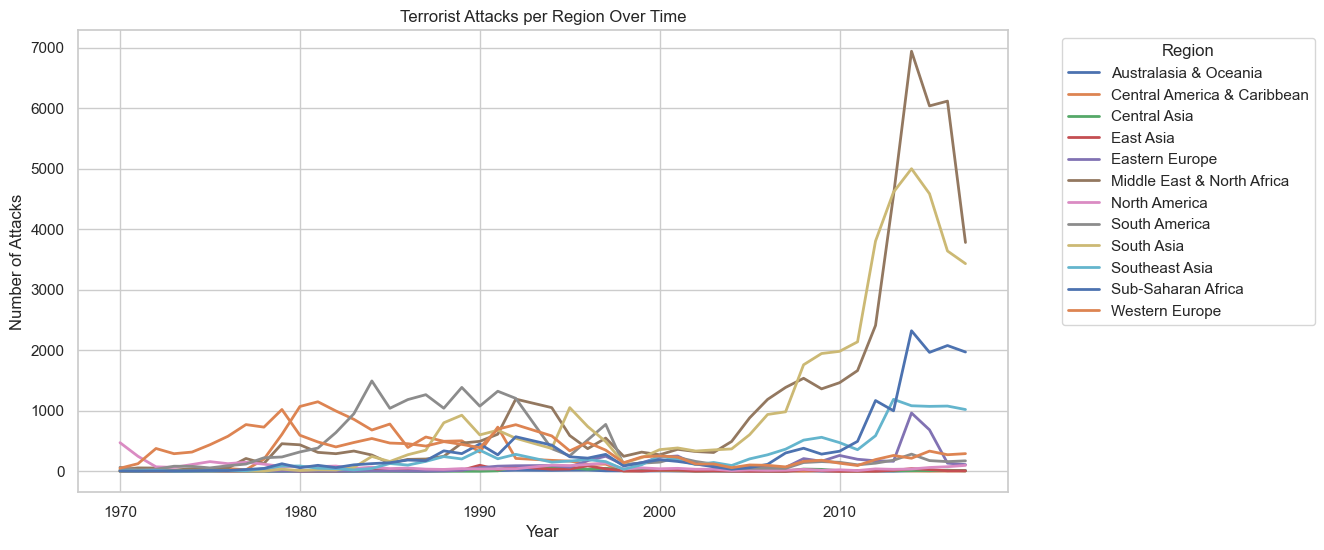

In [12]:
region_year = df.groupby(['iyear', 'region_txt']).size().unstack().fillna(0)
region_year.plot(kind='line', linewidth=2)
plt.title("Terrorist Attacks per Region Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.legend(title='Region', bbox_to_anchor=(1.05, 1))
plt.show()

C:\Users\Vedika\AppData\Local\Temp\ipykernel_6064\2034074664.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_kills.values, y=country_kills.index, palette="Reds_r")


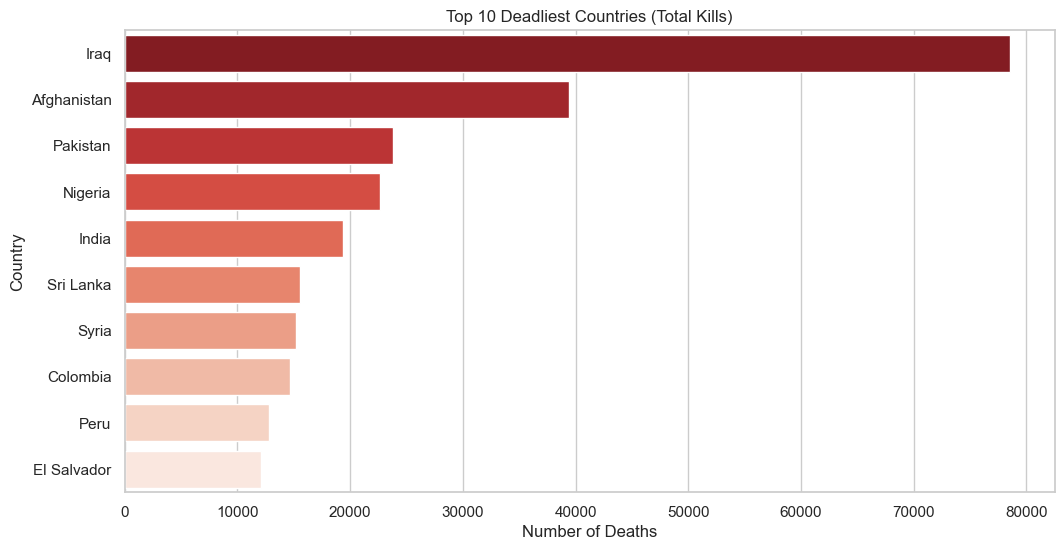

In [13]:
country_kills = df.groupby('country_txt')['nkill'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=country_kills.values, y=country_kills.index, palette="Reds_r")
plt.title("Top 10 Deadliest Countries (Total Kills)")
plt.xlabel("Number of Deaths")
plt.ylabel("Country")
plt.show()

C:\Users\Vedika\AppData\Local\Temp\ipykernel_6064\1108880830.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_counts.values, y=attack_counts.index, palette="Blues_r")


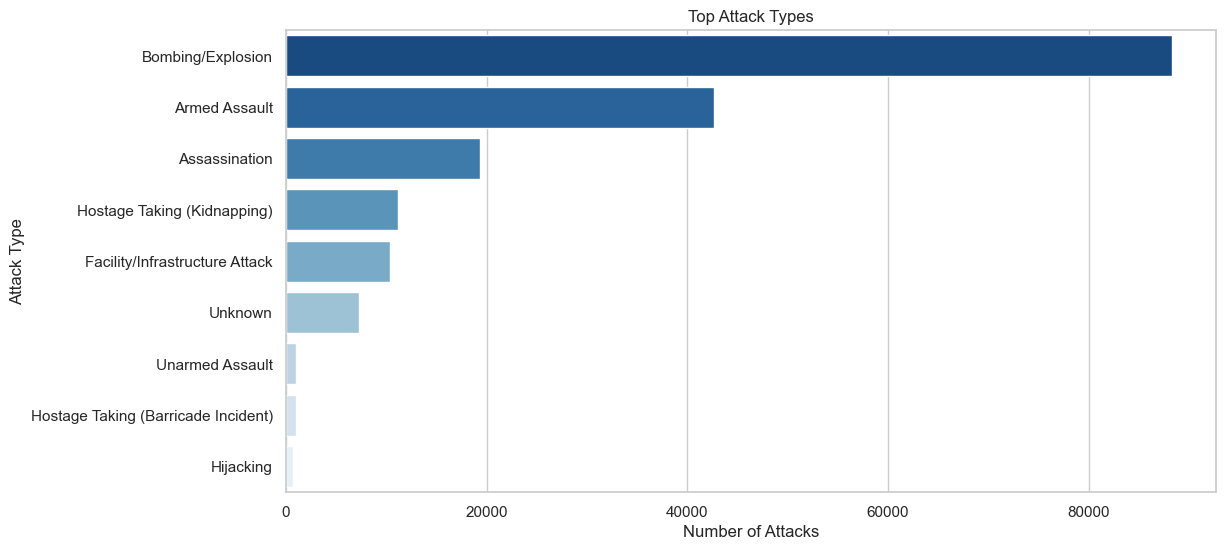

In [14]:
attack_counts = df['attacktype1_txt'].value_counts().head(10)
sns.barplot(x=attack_counts.values, y=attack_counts.index, palette="Blues_r")
plt.title("Top Attack Types")
plt.xlabel("Number of Attacks")
plt.ylabel("Attack Type")
plt.show()

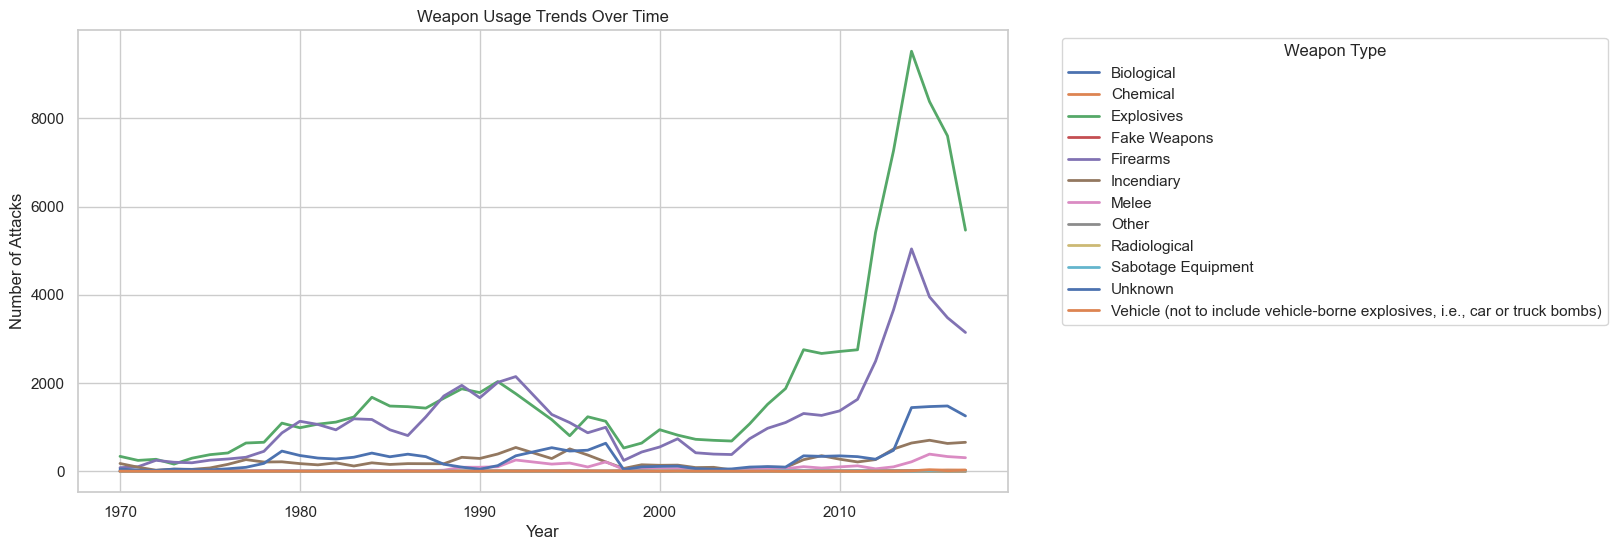

In [15]:
weapon_year = df.groupby(['iyear', 'weaptype1_txt']).size().unstack().fillna(0)
weapon_year.plot(kind='line', linewidth=2)
plt.title("Weapon Usage Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.legend(title='Weapon Type', bbox_to_anchor=(1.05, 1))
plt.show()